<a href="https://colab.research.google.com/github/megha-2002/Let-s-Upgrade/blob/main/Day4_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

In [9]:
from sklearn.datasets import fetch_california_housing 
housing = fetch_california_housing()
housing

{'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block group\n        - HouseAge      median house age in block group\n        - AveRooms      average number of rooms per household\n        - AveBedrms     average number of bedrooms per household\n        - Population    block group population\n        - AveOccup      average number of household members\n        - Latitude      block group latitude\n        - Longitude     block group longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttps://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html\n\nThe target variable is the median house value for California districts,\nexpressed in hundreds of thousands of dollars

In [4]:
type(housing)

sklearn.utils.Bunch

In [6]:
df=pd.DataFrame(housing.data, columns=housing.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [12]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [13]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [15]:
le = LabelEncoder()
df['AveRooms']=le.fit_transform(df['AveRooms'])

In [16]:
# Get column names first
names = df.columns
# Create the Scaler object
scaler = StandardScaler()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=names)
scaled_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,2.344766,0.982143,1.396645,-0.153758,-0.974429,-0.049597,1.052548,-1.327835
1,2.332238,-0.607019,1.012655,-0.263336,0.861439,-0.092512,1.043185,-1.322844
2,1.782699,1.856182,1.654262,-0.049016,-0.820777,-0.025843,1.038503,-1.332827
3,0.932968,1.856182,0.653002,-0.049833,-0.766028,-0.050329,1.038503,-1.337818
4,-0.012881,1.856182,1.043122,-0.032906,-0.759847,-0.085616,1.038503,-1.337818


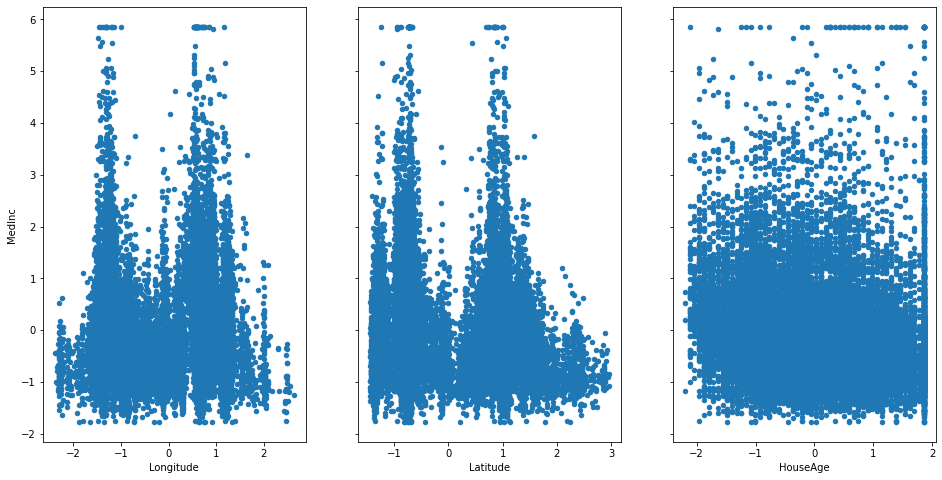

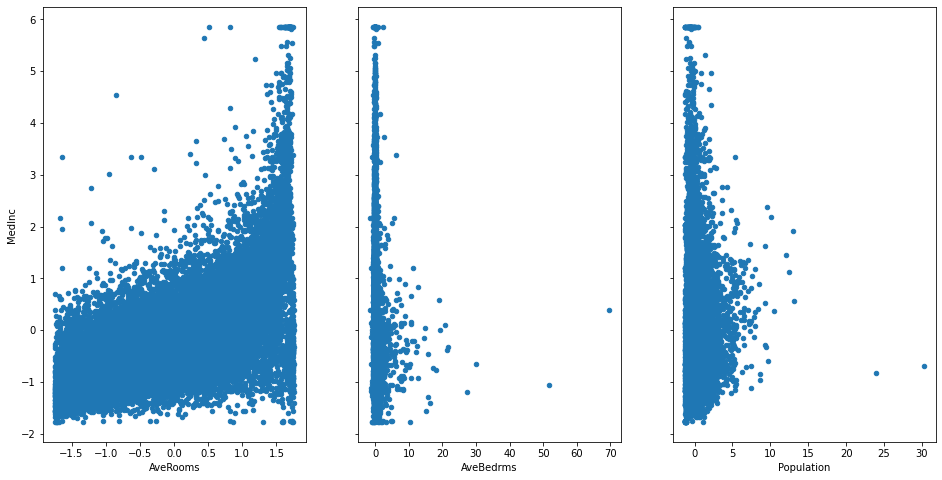

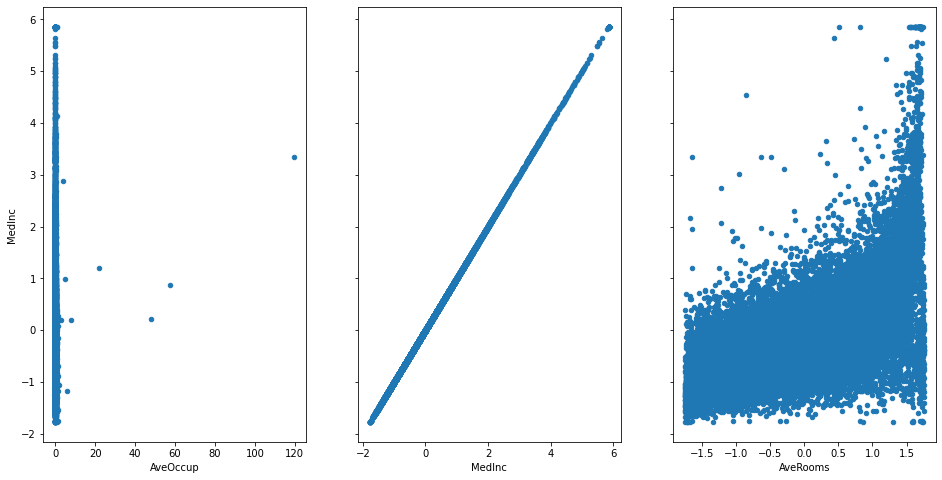

In [17]:
#plot graphs
fig,axs=plt.subplots(1,3,sharey=True)
scaled_df.plot(kind='scatter',x='Longitude',y='MedInc',ax=axs[0],figsize=(16,8))
scaled_df.plot(kind='scatter',x='Latitude',y='MedInc',ax=axs[1],figsize=(16,8))
scaled_df.plot(kind='scatter',x='HouseAge',y='MedInc',ax=axs[2],figsize=(16,8))

#plot graphs
fig,axs=plt.subplots(1,3,sharey=True)
scaled_df.plot(kind='scatter',x='AveRooms',y='MedInc',ax=axs[0],figsize=(16,8))
scaled_df.plot(kind='scatter',x='AveBedrms',y='MedInc',ax=axs[1],figsize=(16,8))
scaled_df.plot(kind='scatter',x='Population',y='MedInc',ax=axs[2],figsize=(16,8))

#plot graphs
fig,axs=plt.subplots(1,3,sharey=True)
scaled_df.plot(kind='scatter',x='AveOccup',y='MedInc',ax=axs[0],figsize=(16,8))
scaled_df.plot(kind='scatter',x='MedInc',y='MedInc',ax=axs[1],figsize=(16,8))
scaled_df.plot(kind='scatter',x='AveRooms',y='MedInc',ax=axs[2],figsize=(16,8))

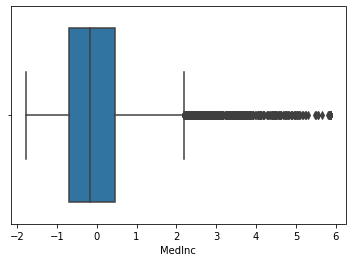

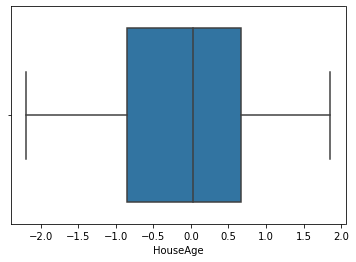

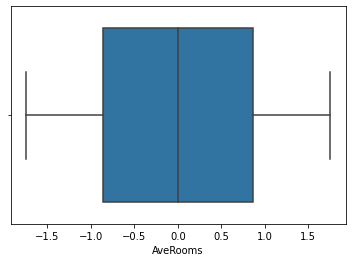

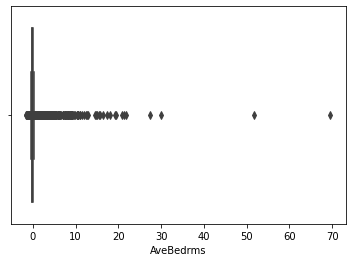

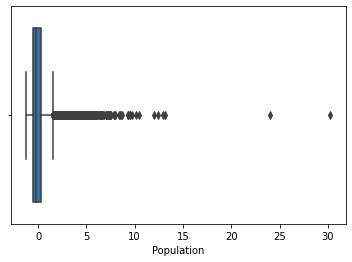

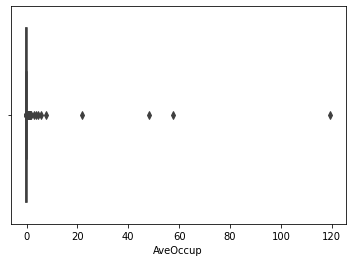

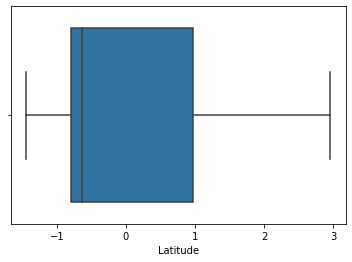

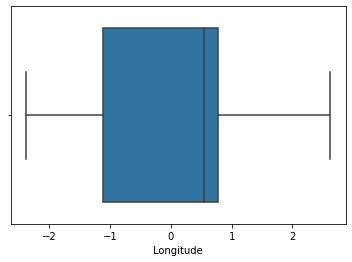

In [18]:
for column in scaled_df:
    plt.figure()
    sns.boxplot(x=scaled_df[column])

In [19]:
X_Features=['MedInc',	'HouseAge',	'AveRooms',	'AveBedrms',	'Population',
            	'AveOccup',	'Latitude',	'Longitude']
X=scaled_df[X_Features]
Y=scaled_df['MedInc']

print(type(X))
print(type(Y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [21]:
print(df.shape)
print(X.shape)
print(Y.shape)

(20640, 8)
(20640, 8)
(20640,)
(20640, 8)
(20640, 8)
(20640,)


In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)

(16512, 8) (16512,)
(4128, 8) (4128,)


In [29]:
rfreg=RandomForestRegressor()
rfreg.fit(x_train,y_train)

RandomForestRegressor()

In [31]:
y_predict = rfreg.predict(x_test)
print(sqrt(mean_squared_error(y_test,y_predict)))
print((r2_score(y_test,y_predict)))

0.0020483551041400832
0.9999959441537855
